In [2]:
import tensorflow as tf
print ("tensorflow version: " + tf.__version__)

tensorflow version: 1.10.0


In [3]:
import keras

Using TensorFlow backend.


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
import itertools

# modelling algorithm:

#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

#modelling helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#preprocessing:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

#evaluation metrics:

#regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

#classficication
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#******Deep learning libraries*************

#visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


#configure visualisations

%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style='whitegrid', color_codes=True)
params ={
    'axes.labelsize':"large",
    'xtick.labelsize':'x-large',
    'legend.fontsize':20,
    'figure.dpi':150,
    'figure.figsize':[25,7]
}
plt.rcParams.update(params)

In [5]:
#center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display:table-cell;
    text-align:center;
    vertical-algin:middle;
}
</style>
""");

In [8]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
df = train.copy()
df_test = test.copy()

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print("Train: ", df.shape)
print("Test: ", df_test.shape)

Train:  (42000, 785)
Test:  (28000, 784)


In [11]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
df.isnull().any().sum()

0

In [14]:
df_test.isnull().any().sum()

0

In [15]:
rdm = np.random.randint(0,42000,size=4)
print(rdm)

[   84 24127 35527   124]


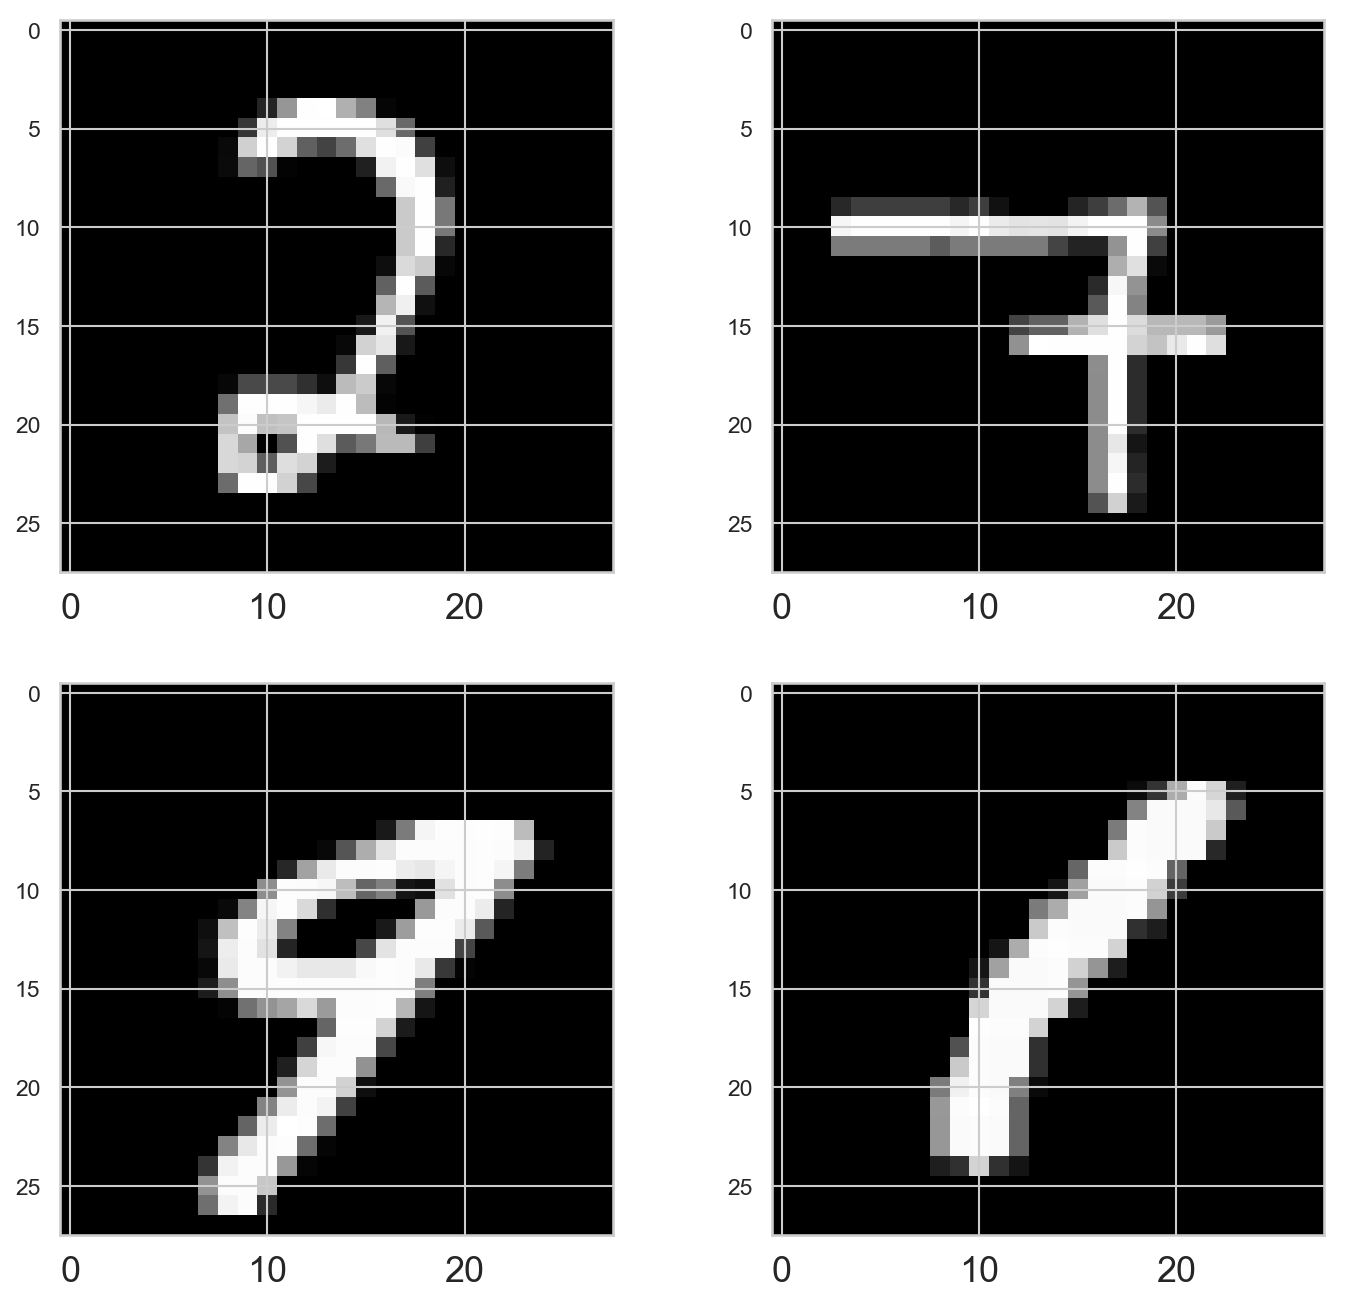

In [19]:
fig, ax = plt.subplots(2,2,figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(df.drop('label',axis=1).values[rdm[0]].reshape(28,28),cmap='gray')
ax[0,1].imshow(df.drop('label', axis=1).values[rdm[1]].reshape(28,28),cmap='gray')
ax[1,0].imshow(df.drop('label',axis=1).values[rdm[2]].reshape(28,28),cmap='gray')
ax[1,1].imshow(df.drop('label',axis=1).values[rdm[3]].reshape(28,28),cmap='gray')

In [20]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5,1,"distribution of label's")

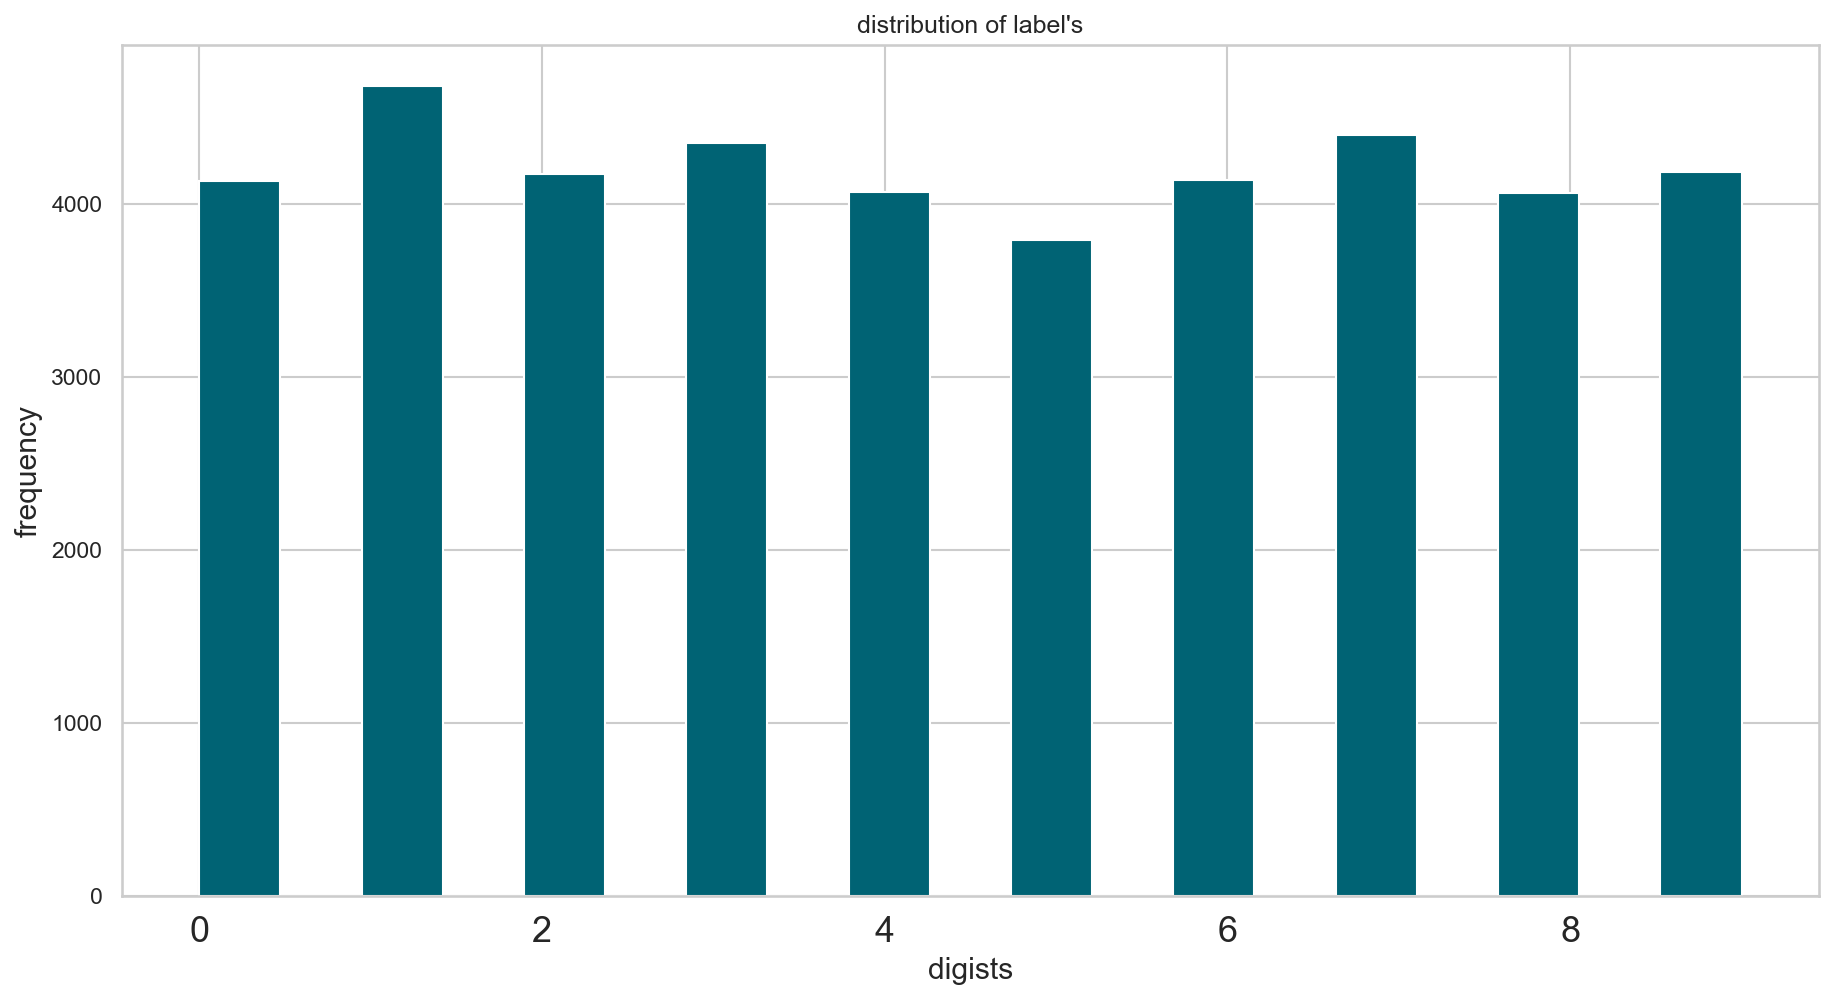

In [22]:
plt.figure(figsize=(13,7))
plt.hist(x=df['label'],bins=19,color='c')
plt.xlabel('digists')
plt.ylabel('frequency')
plt.title('distribution of label\'s')

In [23]:
seed = 66
np.random.seed(seed)

In [24]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train , x_test, y_trian, y_test = train_test_split(X,Y,test_size=0.1, random_state=seed)

In [25]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [26]:
df.dtypes.head()

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object

In [27]:
x_train =x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
df_test= df_test.astype('float')/255